<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Lockdown-impact-on-Students/blob/main/Final_Topic_modeling_4th_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **Topic Modeling through LDA(Latent Dirichlet Allocation) of Student's Feedback**



In [1]:
!pip install PyDrive
!pip install gensim
#!pip install pyldavis
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 29.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
!pip install pyLDAvis==3.2.2

In [4]:
import pandas as pd
#pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re
import gzip
import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [5]:
df=pd.read_csv('Responses.csv')
print(df.head(5))

   Resp ID  ...                                          Responses
0        1  ...  Who will responsible for students carrier beca...
1        2  ...  Taking ongoing online classes is quite tedious...
2        3  ...             Financial problem no network coverage 
3        4  ...  In this pandemic no hope from anyone nobody ca...
4        5  ...  however my college is not helping/ demanding f...

[5 rows x 21 columns]


In [6]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [7]:

df.shape

(1182, 21)

In [8]:
def freq_words(x, terms = 20):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(18,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

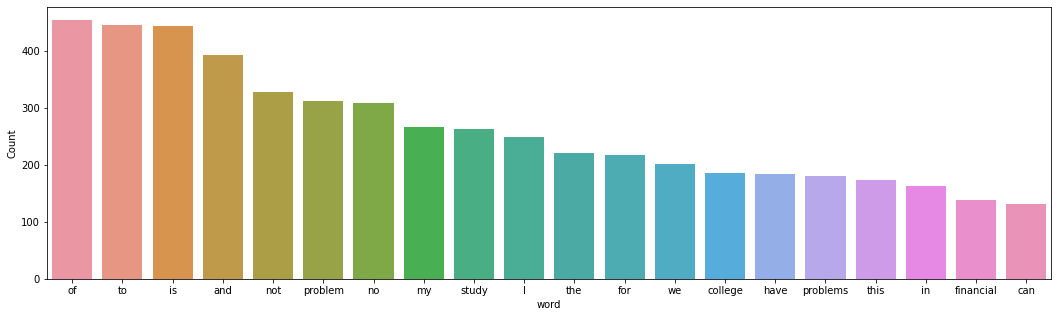

In [9]:
freq_words(df['Responses'])

In [10]:
# replace "n't" with " not"
df['Responses'] = df['Responses'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
df['Responses'] = df['Responses'].str.replace("[^a-zA-Z#]", " ")

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [12]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [13]:
# remove short words (length < 2)
df['Responses'] = df['Responses'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
tweets = [remove_stopwords(r.split()) for r in df['Responses']]

# make entire text lowercase
tweets = [r.lower() for r in tweets]

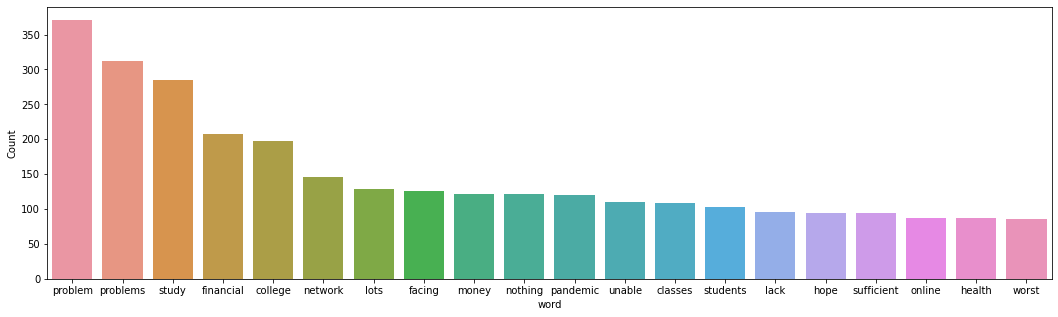

In [14]:
freq_words(tweets, 20)

In [15]:
nlp = spacy.load('en', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [16]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [17]:
tokenized_tweets = pd.Series(tweets).apply(lambda x: x.split())
print(tokenized_tweets[1])

['taking', 'ongoing', 'online', 'classes', 'quite', 'tedious', 'another', 'issue', 'staying', 'motivated', 'entire', 'family', 'including', 'became', 'optimistic', 'face', 'financial', 'difficulties']


In [18]:
print(tokenized_tweets[1])
len(tokenized_tweets[1])

['taking', 'ongoing', 'online', 'classes', 'quite', 'tedious', 'another', 'issue', 'staying', 'motivated', 'entire', 'family', 'including', 'became', 'optimistic', 'face', 'financial', 'difficulties']


18

In [19]:
tweets_2 = lemmatization(tokenized_tweets)
print(tweets_2[1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

['ongoing', 'online', 'class', 'tedious', 'issue', 'motivated', 'entire', 'family', 'optimistic', 'face', 'financial', 'difficulty']


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [20]:
print(tweets_2[3])
len(tweets_2[3])

['help', 'situation', 'everbody', 'problem']


4

In [21]:
set(tokenized_tweets[1]) - set(tweets_2[1])

{'another',
 'became',
 'classes',
 'difficulties',
 'including',
 'quite',
 'staying',
 'taking'}

In [22]:
tweets_3 = []
for i in range(len(tweets_2)):
    tweets_3.append(' '.join(tweets_2[i]))
    
df['tweets'] = tweets_3

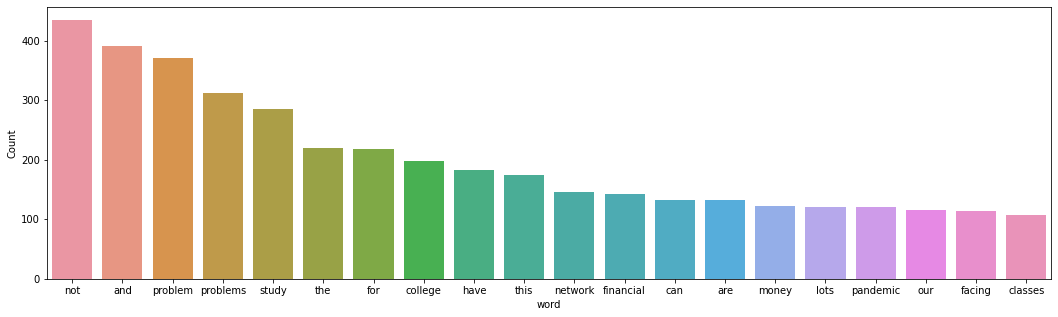

In [23]:
freq_words(df['Responses'], 20)

In [24]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(tweets_2)

In [25]:
# Convert list of tweets (tweets_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tweets_2]

In [26]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [27]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=3, 
                random_state=100,
                chunksize=50,
                passes=50)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [28]:
lda_model.print_topics()

[(0,
  '0.065*"class" + 0.051*"problem" + 0.046*"issue" + 0.044*"college" + 0.044*"online" + 0.042*"sufficient" + 0.038*"teacher" + 0.035*"network" + 0.030*"material" + 0.030*"concentration"'),
 (1,
  '0.130*"problem" + 0.128*"study" + 0.046*"unable" + 0.040*"student" + 0.031*"situation" + 0.030*"financial" + 0.025*"care" + 0.022*"money" + 0.022*"lot" + 0.021*"help"'),
 (2,
  '0.127*"problem" + 0.060*"lot" + 0.057*"financial" + 0.045*"college" + 0.041*"bad" + 0.038*"pandemic" + 0.038*"fee" + 0.033*"money" + 0.030*"experience" + 0.029*"survival"')]

In [29]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.140142  0.197677       1        1  34.899756
1     -0.149248 -0.193573       2        1  32.699656
0      0.289391 -0.004104       3        1  32.400588, topic_info=          Term        Freq       Total Category  logprob  loglift
8        study  298.000000  298.000000  Default  30.0000  30.0000
15       issue   91.000000   91.000000  Default  29.0000  29.0000
9        class  166.000000  166.000000  Default  28.0000  28.0000
18      online   87.000000   87.000000  Default  27.0000  27.0000
39  sufficient   82.000000   82.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
29         due   27.609798   50.988529   Topic3  -4.2646   0.5136
23     problem   99.651731  625.103205   Topic3  -2.9811  -0.7092
7      student   37.391887  117.590096   Topic3  -3.9613  -0.0188
44      unable   35.151900  127.344651   Topic3  -4.0231  -0.1602
47         lot   28.509255  199.931808   Topic3  -4.2326  -0.8208

[154 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
37        3  0.980338        able
33        3  0.958094      action
42        2  0.935901      attend
53        2  0.952889  attendance
54        2  0.952889   available
...     ...       ...         ...
209       2  0.951472       virus
63        2  0.958491         way
195       1  0.965941        well
123       1  0.962787       whole
124       1  0.972720        word

[132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [30]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.065*"class" + 0.051*"problem" + 0.046*"issue" + 0.044*"college" + 0.044*"online" + 0.042*"sufficient" + 0.038*"teacher" + 0.035*"network" + 0.030*"material" + 0.030*"concentration"'),
 (1,
  '0.130*"problem" + 0.128*"study" + 0.046*"unable" + 0.040*"student" + 0.031*"situation" + 0.030*"financial" + 0.025*"care" + 0.022*"money" + 0.022*"lot" + 0.021*"help"'),
 (2,
  '0.127*"problem" + 0.060*"lot" + 0.057*"financial" + 0.045*"college" + 0.041*"bad" + 0.038*"pandemic" + 0.038*"fee" + 0.033*"money" + 0.030*"experience" + 0.029*"survival"')]

In [31]:
#creating wordcloud 
from wordcloud import WordCloud  
WordCloud
from  nltk.corpus import stopwords #for stopwords 

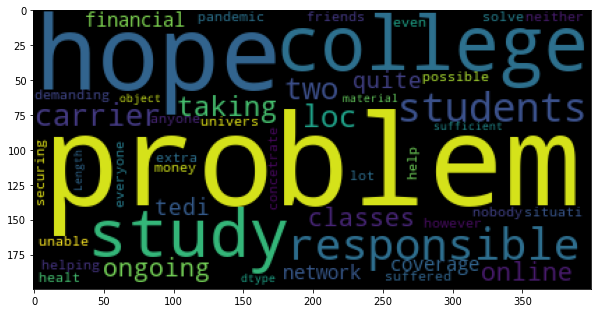

In [32]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(tokenized_tweets) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)